<a href="https://colab.research.google.com/github/debajyoti-iitm/Deep-Learning-NIELIT-classnotes/blob/main/NIFTY500_companies_turnover_prediction_with_Keras_and_concepts_of_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Input

In [ ]:
df = pd.read_csv('nifty500.csv')
print(df[50:90])

           Date      Open      High  ...     Close  Shares Traded  Turnover (Rs. Cr)
50  09-Oct-2020   9728.75   9774.75  ...   9750.15     1619493419           52977.58
51  12-Oct-2020   9793.35   9822.95  ...   9745.35     1459706393           42909.43
52  13-Oct-2020   9745.90   9784.80  ...   9736.45     1321281564           46815.60
53  14-Oct-2020   9726.45   9781.25  ...   9763.40     1600131402           48347.77
54  15-Oct-2020   9801.55   9802.90  ...   9550.05     1639785694           52563.21
55  16-Oct-2020   9588.80   9635.00  ...   9626.25     1471545501           47535.92
56  19-Oct-2020   9710.95   9717.60  ...   9709.30     1622404094           46485.23
57  20-Oct-2020   9699.30   9760.35  ...   9733.00     1573498289           45784.37
58  21-Oct-2020   9780.50   9821.95  ...   9756.60     1722901298           56998.70
59  22-Oct-2020   9726.45   9763.80  ...   9745.05     1634025894           51725.18
60  23-Oct-2020   9794.40   9807.15  ...   9780.35     1865194287

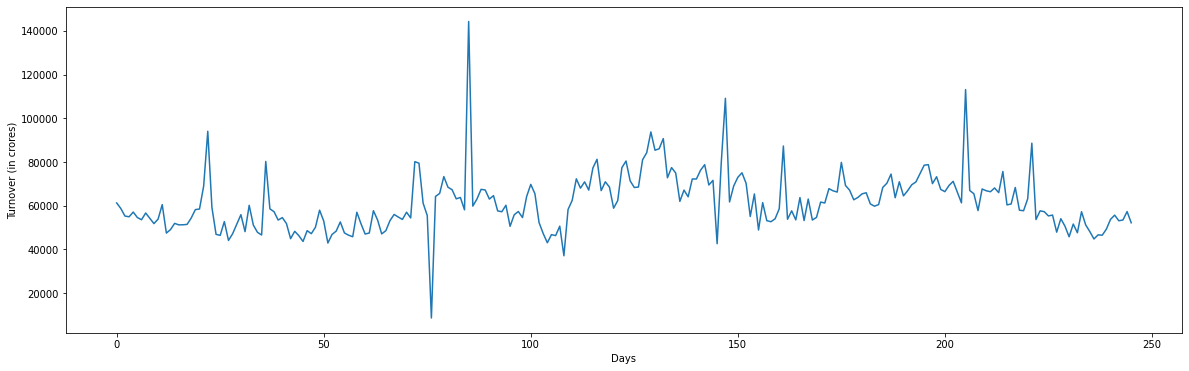

In [ ]:
data = df.iloc[:,6].values
plt.figure(figsize=(20, 6))
plt.xlabel('Days')
plt.ylabel('Turnover (in crores)')
plt.plot(data)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  
mask = (df['Date'] == '2020-7-30')
print(df.loc[mask])     # index for the date 18-Apr-2019
print('--------------------------------------------')
train = data[:205]
test = data[175:]

        Date    Open     High     Low   Close  Shares Traded  Turnover (Rs. Cr)
0 2020-07-30  9136.2  9163.95  9013.9  9031.7     1999618009           61249.14
--------------------------------------------


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

In [ ]:
X_train = []
y_train = []
for i in range(30, train.shape[0]):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_train)
print(y_train[:2])

(175, 30) (175,)
[[0.38791218 0.36918111 0.34366258 ... 0.2615498  0.2841014  0.31608179]
 [0.36918111 0.34366258 0.3413383  ... 0.2841014  0.31608179 0.34833539]
 [0.34366258 0.3413383  0.35720464 ... 0.31608179 0.34833539 0.29117445]
 ...
 [0.43613181 0.4288467  0.42461452 ... 0.43356843 0.42601365 0.44684479]
 [0.4288467  0.42461452 0.52462142 ... 0.42601365 0.44684479 0.46084625]
 [0.42461452 0.52462142 0.4469394  ... 0.44684479 0.46084625 0.4250552 ]]
[0.34833539 0.29117445]


In [ ]:
# Training LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = Sequential()
# LSTM layer
model.add(LSTM(16, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
#  Dense layer
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history=model.fit(X_train, y_train, epochs = 45, batch_size = 4)

Epoch 1/45
44/44 [==============================] - 3s 10ms/step - loss: 0.6189
Epoch 2/45
44/44 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 3/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 4/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 5/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 6/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 7/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 8/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 9/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 10/45
44/44 [==============================] - 0s 11ms/step - loss: 0.0109
Epoch 11/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 12/45
44/44 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 13/45
44/44 [==================

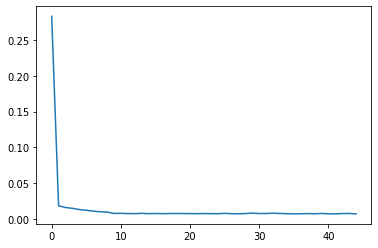

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [ ]:
X_test = []
y_test = []
for i in range(30, test.shape[0]):
    X_test.append(test[i-30:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(41, 30)
(175, 30, 1)


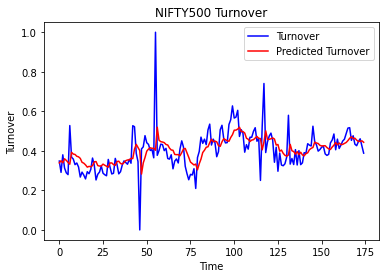

In [ ]:
predicted = model.predict(X_train)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(train[-175:]), color = 'blue', label = 'Turnover')
plt.plot(predicted, color = 'red', label = 'Predicted Turnover')
plt.title('NIFTY500 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()

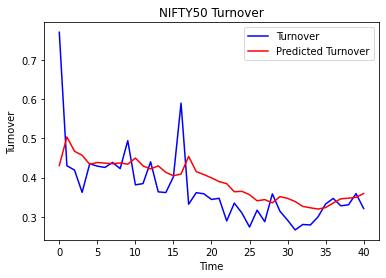

In [ ]:
predicted = model.predict(X_test)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(test[-41:]), color = 'blue', label = 'Turnover')
plt.plot(predicted, color = 'red', label = 'Predicted Turnover')
plt.title('NIFTY500 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()